In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
%matplotlib inline

In [67]:
data = pd.read_csv("output_finall.csv")

In [68]:
data

,DATE,OPEN,HIGH,CLOSE,LOW,SHARES_TRADED
0,2015-11-09,7788.25,7937.75,7915.20,7771.70,2.184224e+08
1,2015-11-10,7877.60,7885.10,7783.35,7772.85,1.702674e+08
2,2015-11-11,7838.80,7847.95,7825.00,7819.10,2.238044e+07
3,2015-11-13,7762.45,7775.10,7762.25,7730.90,1.658768e+08
4,2015-11-16,7732.95,7838.85,7806.60,7714.15,1.541349e+08
...,...,...,...,...,...,...
2127,2024-06-04,23179.50,23179.50,21884.50,21281.45,1.006105e+09
2128,2024-06-05,22128.35,22670.40,22620.35,21791.95,6.384871e+08
2129,2024-06-06,22798.60,22910.15,22821.40,22642.60,4.804133e+08
2130,2024-06-07,22821.85,23320.20,23290.15,22789.05,4.735549e+08


In [69]:
data.isnull().sum()

DATE             0
OPEN             0
HIGH             0
CLOSE            0
LOW              0
SHARES_TRADED    1
dtype: int64

In [70]:
data.tail()

,DATE,OPEN,HIGH,CLOSE,LOW,SHARES_TRADED
2127,2024-06-04,23179.50,23179.50,21884.50,21281.45,1.006105e+09
2128,2024-06-05,22128.35,22670.40,22620.35,21791.95,6.384871e+08
2129,2024-06-06,22798.60,22910.15,22821.40,22642.60,4.804133e+08
2130,2024-06-07,22821.85,23320.20,23290.15,22789.05,4.735549e+08
2131,2024-06-10,23319.15,23411.90,23259.20,23227.15,3.043924e+08


In [71]:
data.dropna(axis=0,inplace = True)

In [72]:
data.isnull().sum()

DATE             0
OPEN             0
HIGH             0
CLOSE            0
LOW              0
SHARES_TRADED    0
dtype: int64

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2131 entries, 0 to 2131
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATE           2131 non-null   object 
 1   OPEN           2131 non-null   float64
 2   HIGH           2131 non-null   float64
 3   CLOSE          2131 non-null   float64
 4   LOW            2131 non-null   float64
 5   SHARES_TRADED  2131 non-null   float64
dtypes: float64(5), object(1)
memory usage: 116.5+ KB


In [74]:
data['DATE']=pd.to_datetime(data['DATE']) 

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2131 entries, 0 to 2131
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DATE           2131 non-null   datetime64[ns]
 1   OPEN           2131 non-null   float64       
 2   HIGH           2131 non-null   float64       
 3   CLOSE          2131 non-null   float64       
 4   LOW            2131 non-null   float64       
 5   SHARES_TRADED  2131 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 116.5 KB


In [76]:
data.drop('OPEN', axis=1,inplace=True)

In [77]:
data.head()

,DATE,HIGH,CLOSE,LOW,SHARES_TRADED
0,2015-11-09,7937.75,7915.20,7771.70,218422388.0
1,2015-11-10,7885.10,7783.35,7772.85,170267413.0
2,2015-11-11,7847.95,7825.00,7819.10,22380435.0
3,2015-11-13,7775.10,7762.25,7730.90,165876819.0
4,2015-11-16,7838.85,7806.60,7714.15,154134885.0


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2131 entries, 0 to 2131
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DATE           2131 non-null   datetime64[ns]
 1   HIGH           2131 non-null   float64       
 2   CLOSE          2131 non-null   float64       
 3   LOW            2131 non-null   float64       
 4   SHARES_TRADED  2131 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 99.9 KB


In [79]:
data.set_index('DATE',inplace=True)

In [80]:
data.head()

,HIGH,CLOSE,LOW,SHARES_TRADED
DATE,,,,
2015-11-09,7937.75,7915.20,7771.70,218422388.0
2015-11-10,7885.10,7783.35,7772.85,170267413.0
2015-11-11,7847.95,7825.00,7819.10,22380435.0
2015-11-13,7775.10,7762.25,7730.90,165876819.0
2015-11-16,7838.85,7806.60,7714.15,154134885.0


<AxesSubplot: xlabel='DATE'>

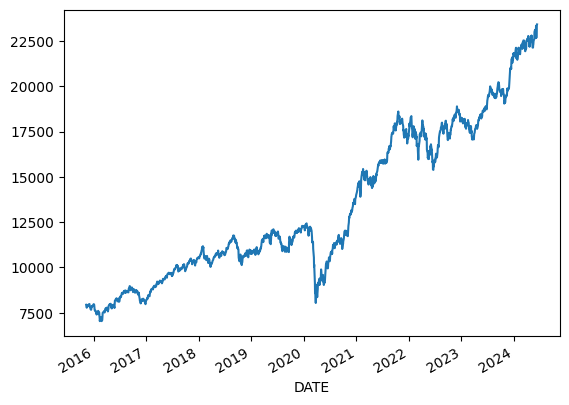

In [81]:
data['HIGH'].plot()

<AxesSubplot: xlabel='DATE'>

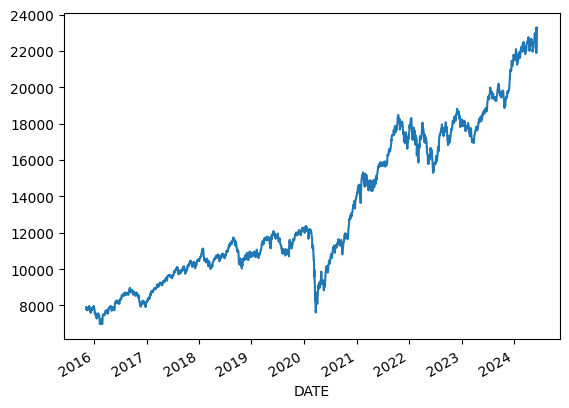

In [82]:
data['CLOSE'].plot()

<AxesSubplot: xlabel='DATE'>

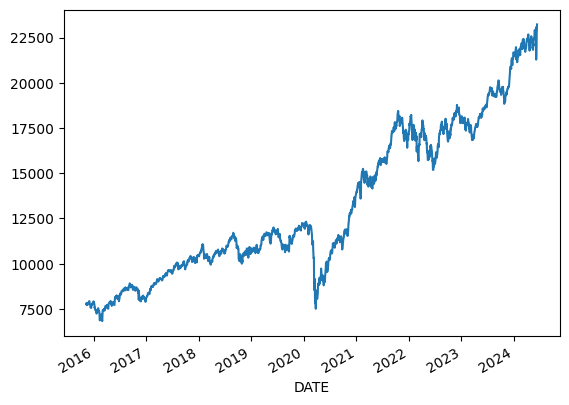

In [83]:
data['LOW'].plot()

<AxesSubplot: xlabel='DATE'>

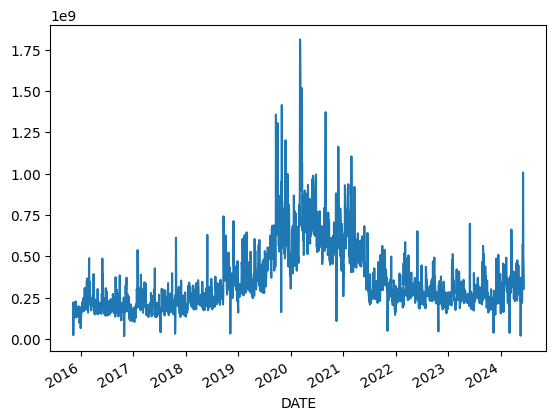

In [84]:
data['SHARES_TRADED'].plot()

In [85]:
from statsmodels.tsa.stattools import adfuller

In [86]:
def adf_test(df):
    for column in df.columns:
        print(f'Performing ADF test for column: {column}')
        result = adfuller(df[column])
        print("ADF statistics: {}".format(result[0]))
        print('P-value: {}'.format(result[1]))
        if result[1] <= 0.05:
            print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
        else:
            print("Weak evidence against the null hypothesis. Time series has a unit root, indicating it is non-stationary")
        print('---------------------------------')


In [87]:
adf_test(data)

Performing ADF test for column: HIGH
ADF statistics: 0.6562278168495475
P-value: 0.9889225910240771
Weak evidence against the null hypothesis. Time series has a unit root, indicating it is non-stationary
---------------------------------
Performing ADF test for column: CLOSE
ADF statistics: 0.5758004917132794
P-value: 0.9870037134047613
Weak evidence against the null hypothesis. Time series has a unit root, indicating it is non-stationary
---------------------------------
Performing ADF test for column: LOW
ADF statistics: 0.5654554663280212
P-value: 0.9867324820301162
Weak evidence against the null hypothesis. Time series has a unit root, indicating it is non-stationary
---------------------------------
Performing ADF test for column: SHARES_TRADED
ADF statistics: -2.7181199401281493
P-value: 0.07095487044316458
Weak evidence against the null hypothesis. Time series has a unit root, indicating it is non-stationary
---------------------------------


In [88]:
data['HIGH difference'] = data['HIGH']-data['HIGH'].shift(1)
data['LOW difference'] = data['LOW']-data['LOW'].shift(1)
data['CLOSE difference'] = data['CLOSE']-data['CLOSE'].shift(1)
data['SHARES_TRADED difference'] = data['SHARES_TRADED']-data['SHARES_TRADED'].shift(1)

In [89]:
data

,HIGH,CLOSE,LOW,SHARES_TRADED,HIGH difference,LOW difference,CLOSE difference,SHARES_TRADED difference
DATE,,,,,,,,
2015-11-09,7937.75,7915.20,7771.70,2.184224e+08,NaN,NaN,NaN,NaN
2015-11-10,7885.10,7783.35,7772.85,1.702674e+08,-52.65,1.15,-131.85,-48154975.0
2015-11-11,7847.95,7825.00,7819.10,2.238044e+07,-37.15,46.25,41.65,-147886978.0
2015-11-13,7775.10,7762.25,7730.90,1.658768e+08,-72.85,-88.20,-62.75,143496384.0
2015-11-16,7838.85,7806.60,7714.15,1.541349e+08,63.75,-16.75,44.35,-11741934.0
...,...,...,...,...,...,...,...,...
2024-06-04,23179.50,21884.50,21281.45,1.006105e+09,-159.20,-1780.85,-1379.40,436679489.0
2024-06-05,22670.40,22620.35,21791.95,6.384871e+08,-509.10,510.50,735.85,-367617981.0
2024-06-06,22910.15,22821.40,22642.60,4.804133e+08,239.75,850.65,201.05,-158073788.0


In [90]:
adf_test(data.dropna())

Performing ADF test for column: HIGH
ADF statistics: 0.6569950197469002
P-value: 0.9889393734154135
Weak evidence against the null hypothesis. Time series has a unit root, indicating it is non-stationary
---------------------------------
Performing ADF test for column: CLOSE
ADF statistics: 0.594227209712635
P-value: 0.987472472134657
Weak evidence against the null hypothesis. Time series has a unit root, indicating it is non-stationary
---------------------------------
Performing ADF test for column: LOW
ADF statistics: 0.545336032083722
P-value: 0.9861878208332802
Weak evidence against the null hypothesis. Time series has a unit root, indicating it is non-stationary
---------------------------------
Performing ADF test for column: SHARES_TRADED
ADF statistics: -2.7194984827884734
P-value: 0.07072452758929351
Weak evidence against the null hypothesis. Time series has a unit root, indicating it is non-stationary
---------------------------------
Performing ADF test for column: HIGH dif

In [132]:
data['HIGH 30 difference'] = data['HIGH']-data['HIGH'].shift(30)
data['LOW 30 difference'] = data['LOW']-data['LOW'].shift(30)
data['CLOSE 30 difference'] = data['CLOSE']-data['CLOSE'].shift(30)
data['SHARES_TRADED 30 difference'] = data['SHARES_TRADED']-data['SHARES_TRADED'].shift(30)

In [133]:
adf_test(data.dropna())

Performing ADF test for column: HIGH
ADF statistics: 0.6410905564860435
P-value: 0.988585844730714
Weak evidence against the null hypothesis. Time series has a unit root, indicating it is non-stationary
---------------------------------
Performing ADF test for column: CLOSE
ADF statistics: 0.5806519804254862
P-value: 0.9871288967910365
Weak evidence against the null hypothesis. Time series has a unit root, indicating it is non-stationary
---------------------------------
Performing ADF test for column: LOW
ADF statistics: 0.5346626702144162
P-value: 0.9858894201507182
Weak evidence against the null hypothesis. Time series has a unit root, indicating it is non-stationary
---------------------------------
Performing ADF test for column: SHARES_TRADED
ADF statistics: -2.6861723241287545
P-value: 0.07646177805924481
Weak evidence against the null hypothesis. Time series has a unit root, indicating it is non-stationary
---------------------------------
Performing ADF test for column: HIGH d

In [134]:
data

,HIGH,CLOSE,LOW,SHARES_TRADED,HIGH difference,LOW difference,CLOSE difference,SHARES_TRADED difference,HIGH 12 difference,LOW 12 difference,CLOSE 12 difference,SHARES_TRADED 12 difference,HIGH 30 difference,LOW 30 difference,CLOSE 30 difference,SHARES_TRADED 30 difference
DATE,,,,,,,,,,,,,,,,
2015-11-09,7937.75,7915.20,7771.70,2.184224e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-10,7885.10,7783.35,7772.85,1.702674e+08,-52.65,1.15,-131.85,-48154975.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-11,7847.95,7825.00,7819.10,2.238044e+07,-37.15,46.25,41.65,-147886978.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-13,7775.10,7762.25,7730.90,1.658768e+08,-72.85,-88.20,-62.75,143496384.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-16,7838.85,7806.60,7714.15,1.541349e+08,63.75,-16.75,44.35,-11741934.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-04,23179.50,21884.50,21281.45,1.006105e+09,-159.20,-1780.85,-1379.40,436679489.0,677.35,-1064.20,-581.60,763450488.0,803.85,-916.7,-451.90,726845487.0
2024-06-05,22670.40,22620.35,21791.95,6.384871e+08,-509.10,510.50,735.85,-367617981.0,150.15,-678.10,118.35,619422511.0,222.85,-557.5,252.35,406966264.0
2024-06-06,22910.15,22821.40,22642.60,4.804133e+08,239.75,850.65,201.05,-158073788.0,319.05,238.05,292.35,132821702.0,433.70,258.6,419.00,244514647.0


In [94]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

## Now lets select p and q values, where p value determind by PACF and q value determind by ACF

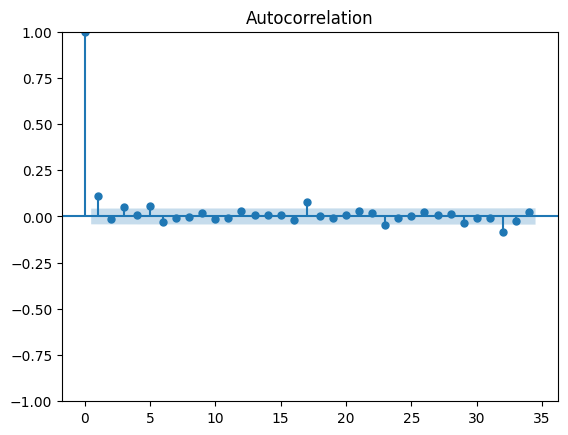

In [95]:
acf = plot_acf(data['HIGH difference'].dropna())

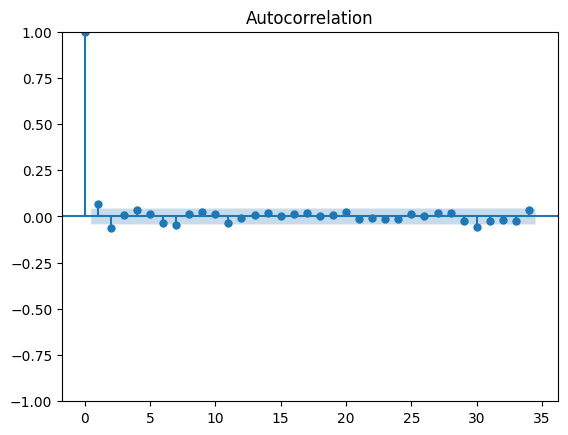

In [96]:
acf = plot_acf(data['LOW difference'].dropna())

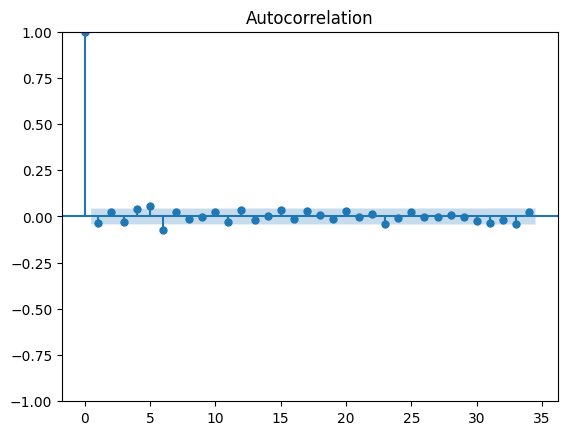

In [97]:
acf = plot_acf(data['CLOSE difference'].dropna())

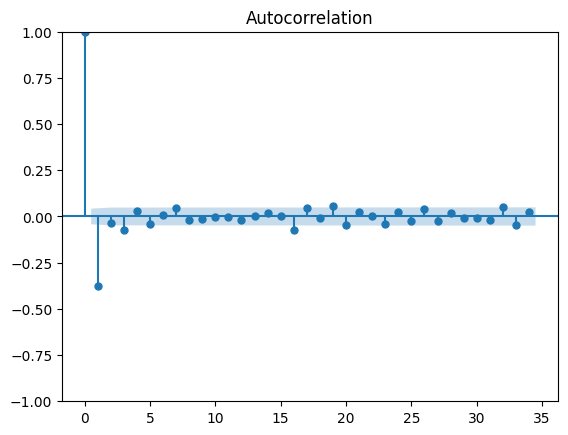

In [98]:
acf = plot_acf(data['SHARES_TRADED difference'].dropna())
## Any line having below and above this have direct impact

## q value is 7 to 11 and with the help of ACF you are performing MA

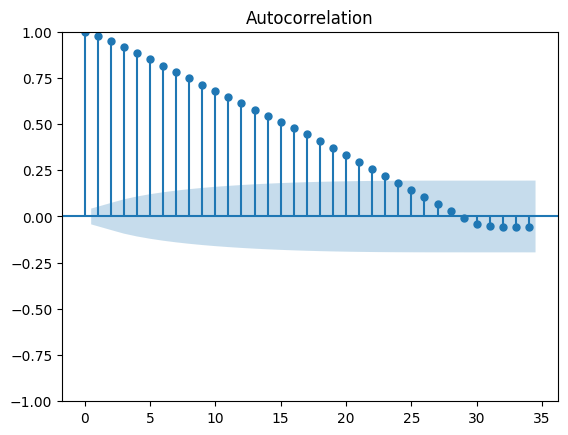

In [135]:
acf = plot_acf(data['HIGH 30 difference'].dropna())

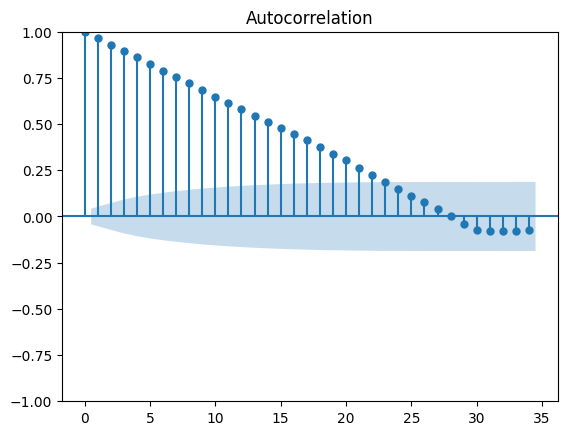

In [136]:
acf = plot_acf(data['LOW 30 difference'].dropna())

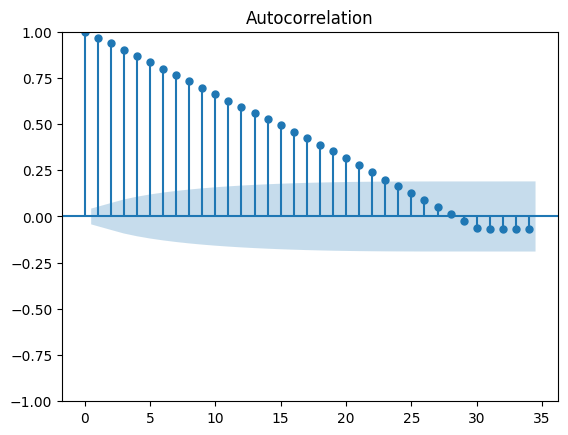

In [137]:
acf = plot_acf(data['CLOSE 30 difference'].dropna())

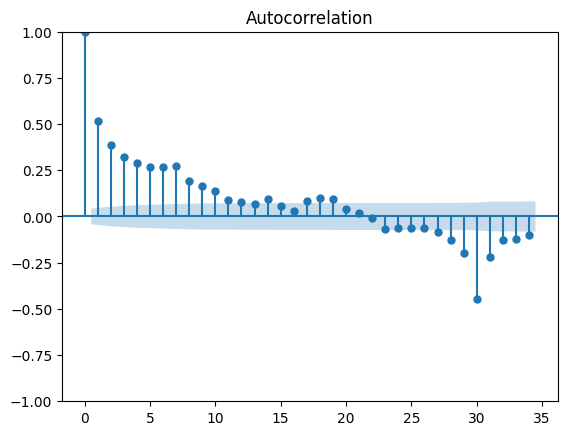

In [138]:
acf = plot_acf(data['SHARES_TRADED 30 difference'].dropna())

## p values are 1, 2, 4, 5, 6, 9 and with the help of PACF you are performing AR

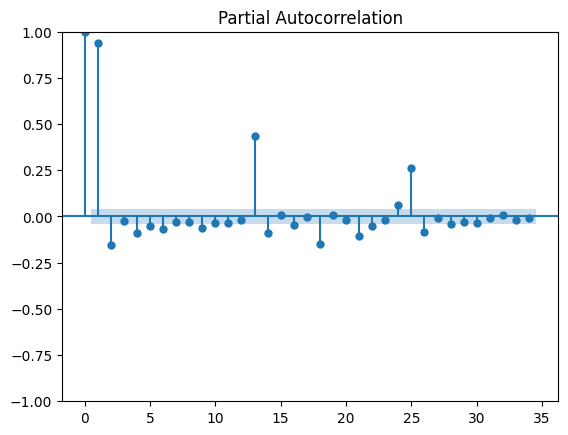

In [103]:
acf = plot_pacf(data['HIGH 12 difference'].dropna())

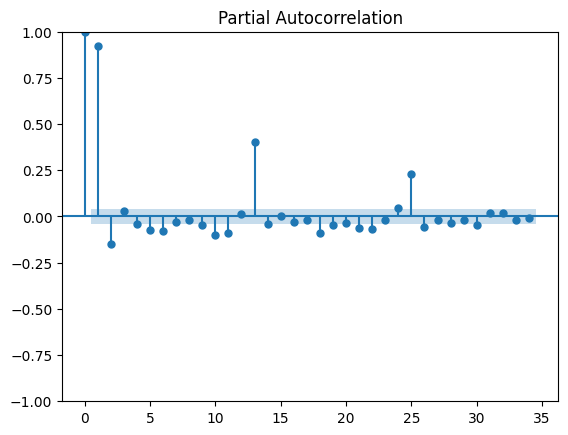

In [104]:
acf = plot_pacf(data['LOW 12 difference'].dropna())

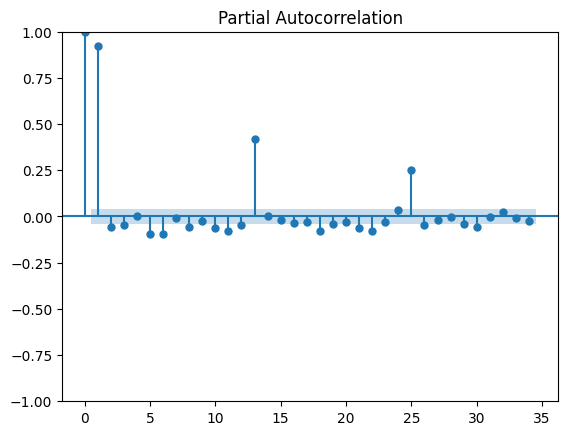

In [105]:
acf = plot_pacf(data['CLOSE 12 difference'].dropna())

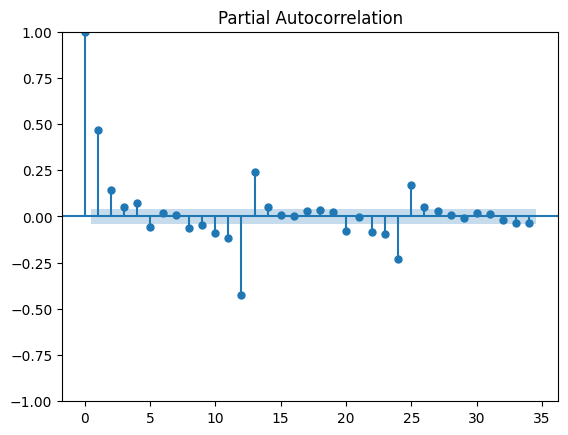

In [106]:
acf = plot_pacf(data['SHARES_TRADED 12 difference'].dropna())

In [107]:
from datetime import datetime, timedelta
train_dataset_end = datetime(2022,1,1)
test_dataset_end = datetime(2024,6,10)

In [108]:
train_data = data[:train_dataset_end]
test_data = data[train_dataset_end+timedelta(days=1):test_dataset_end]

In [109]:
train_data

,HIGH,CLOSE,LOW,SHARES_TRADED,HIGH difference,LOW difference,CLOSE difference,SHARES_TRADED difference,HIGH 12 difference,LOW 12 difference,CLOSE 12 difference,SHARES_TRADED 12 difference
DATE,,,,,,,,,,,,
2015-11-09,7937.75,7915.20,7771.70,218422388.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-10,7885.10,7783.35,7772.85,170267413.0,-52.65,1.15,-131.85,-48154975.0,NaN,NaN,NaN,NaN
2015-11-11,7847.95,7825.00,7819.10,22380435.0,-37.15,46.25,41.65,-147886978.0,NaN,NaN,NaN,NaN
2015-11-13,7775.10,7762.25,7730.90,165876819.0,-72.85,-88.20,-62.75,143496384.0,NaN,NaN,NaN,NaN
2015-11-16,7838.85,7806.60,7714.15,154134885.0,63.75,-16.75,44.35,-11741934.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,17112.05,17086.25,16833.20,144777457.0,-43.55,-76.40,82.50,-37787376.0,-431.20,-546.40,-430.60,-92392815.0
2021-12-28,17250.25,17233.25,17161.15,176026100.0,138.20,327.95,147.00,31248643.0,-284.10,-244.10,-278.05,-28441384.0
2021-12-29,17285.95,17213.60,17176.65,161679423.0,35.70,15.50,-19.65,-14346677.0,-353.55,-179.30,-154.65,-94881111.0


In [110]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2022-01-03 00:00:00
2024-06-10 00:00:00


In [111]:
from statsmodels.tsa.statespace.sarimax import SARIMAX 

In [112]:
data.columns

Index(['HIGH', 'CLOSE', 'LOW', 'SHARES_TRADED', 'HIGH difference',
       'LOW difference', 'CLOSE difference', 'SHARES_TRADED difference',
       'HIGH 12 difference', 'LOW 12 difference', 'CLOSE 12 difference',
       'SHARES_TRADED 12 difference'],
      dtype='object')

In [113]:
#model_SARIMA = SARIMAX(data['CLOSE'],order=(p,0,q),seasonal_order=(0,d,0,12))
model_SARIMA = SARIMAX(train_data['CLOSE'],order=(1,0,11),seasonal_order=(0,1,0,12))

C:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [114]:
model_SARIMA_fit = model_SARIMA.fit()

C:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [115]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                CLOSE   No. Observations:                 1521
Model:             SARIMAX(1, 0, 11)x(0, 1, [], 12)   Log Likelihood               -9498.259
Date:                              Wed, 12 Jun 2024   AIC                          19022.517
Time:                                      07:55:13   BIC                          19091.667
Sample:                                           0   HQIC                         19048.270
                                             - 1521                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0104      0.024     -0.435      0.663      -0.057       0.036
ma.L1          0.9787      0.047     21.013      0.000       0.887       1.070
ma.L2          0.9760      0.071     13.700      0.000       0.836       1.116
ma.L3          0.9826      0.075     13.079      0.000       0.835       1.130
ma.L4          0.9820      0.062     15.712      0.000       0.859       1.104
ma.L5          1.0093      0.038     26.645      0.000       0.935       1.084
ma.L6          0.9769      0.046     21.168      0.000       0.886       1.067
ma.L7          0.9913      0.088     11.230      0.000       0.818       1.164
ma.L8          0.9841      0.109      8.993      0.000       0.770       1.199
ma.L9          0.9753      0.111      8.771      0.000       0.757       1.193
ma.L10         0.9876      0.092     10.764      0.000       0.808       1.167
ma.L11         0.9638      0.057     16.972      0.000       0.852       1.075
sigma2      2.167e+04   1316.166     16.464      0.000    1.91e+04    2.42e+04
===================================================================================
Ljung-Box (L1) (Q):                   1.02   Jarque-Bera (JB):             16655.77
Prob(Q):                              0.31   Prob(JB):                         0.00
Heteroskedasticity (H):               2.96   Skew:                            -1.59
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [116]:
test_data

,HIGH,CLOSE,LOW,SHARES_TRADED,HIGH difference,LOW difference,CLOSE difference,SHARES_TRADED difference,HIGH 12 difference,LOW 12 difference,CLOSE 12 difference,SHARES_TRADED 12 difference
DATE,,,,,,,,,,,,
2022-01-03,17646.65,17625.70,17383.30,2.004564e+08,245.85,144.80,271.65,33430710.0,267.30,198.35,377.30,-19039633.0
2022-01-04,17827.60,17805.25,17593.55,2.474375e+08,180.95,210.25,179.55,46981042.0,529.45,627.10,820.05,-107153894.0
2022-01-05,17944.70,17925.25,17748.85,2.514600e+08,117.10,155.30,120.00,4022566.0,1104.60,1338.65,1311.05,-79154041.0
2022-01-06,17797.95,17745.90,17655.55,2.364548e+08,-146.75,-93.30,-179.35,-15005214.0,861.55,967.30,975.05,-4576010.0
2022-01-07,17905.00,17812.70,17704.55,2.393380e+08,107.05,49.00,66.80,2883191.0,934.00,885.05,857.25,31391910.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-04,23179.50,21884.50,21281.45,1.006105e+09,-159.20,-1780.85,-1379.40,436679489.0,677.35,-1064.20,-581.60,763450488.0
2024-06-05,22670.40,22620.35,21791.95,6.384871e+08,-509.10,510.50,735.85,-367617981.0,150.15,-678.10,118.35,619422511.0
2024-06-06,22910.15,22821.40,22642.60,4.804133e+08,239.75,850.65,201.05,-158073788.0,319.05,238.05,292.35,132821702.0


In [117]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2022-01-03 00:00:00
2024-06-10 00:00:00


In [124]:
# pred_Sarima=model_SARIMA_fit.predict(start=datetime(2017,6,6),end=datetime(2022,12,1))
forecasts_test = model_SARIMA_fit.predict(start= ,end=len(train_data)+len(test_data))

C:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [125]:
forecasts_test

1522    17370.295573
1523    17364.033072
1524    17343.076244
1525    17334.773263
1526    17360.150932
            ...     
2127    17346.266093
2128    17311.747300
2129    17322.386812
2130    17350.079614
2131    17367.722289
Name: predicted_mean, Length: 610, dtype: float64

In [126]:
residuals=test_data['CLOSE']-forecasts_test

ValueError: Length of values (1232) does not match length of index (1220)

<AxesSubplot: xlabel='DATE'>

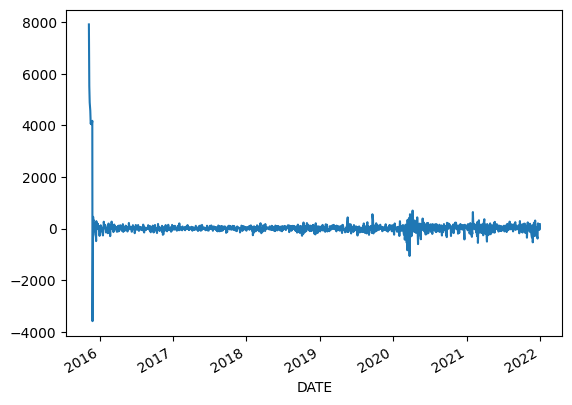

In [57]:
model_SARIMA_fit.resid.plot()

<AxesSubplot: ylabel='Density'>

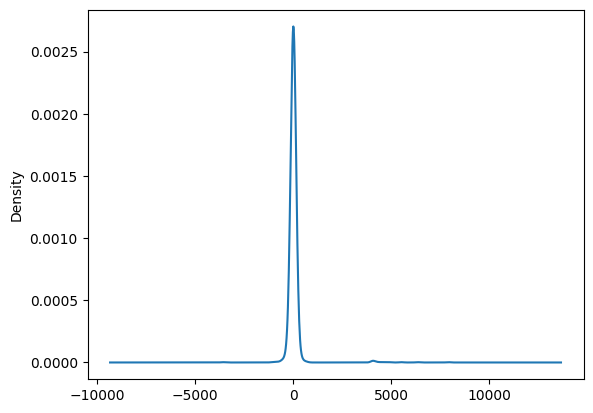

In [58]:
model_SARIMA_fit.resid.plot(kind='kde')

In [127]:
test_data['Predicted_SARIMA']=forecasts_test

C:\Users\asus\AppData\Local\Temp\ipykernel_16788\3017448007.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=forecasts_test


In [128]:
test_data.head()

,HIGH,CLOSE,LOW,SHARES_TRADED,HIGH difference,LOW difference,CLOSE difference,SHARES_TRADED difference,HIGH 12 difference,LOW 12 difference,CLOSE 12 difference,SHARES_TRADED 12 difference,Predicted_SARIMA
DATE,,,,,,,,,,,,,
2022-01-03,17646.65,17625.70,17383.30,200456430.0,245.85,144.80,271.65,33430710.0,267.30,198.35,377.30,-19039633.0,NaN
2022-01-04,17827.60,17805.25,17593.55,247437472.0,180.95,210.25,179.55,46981042.0,529.45,627.10,820.05,-107153894.0,NaN
2022-01-05,17944.70,17925.25,17748.85,251460038.0,117.10,155.30,120.00,4022566.0,1104.60,1338.65,1311.05,-79154041.0,NaN
2022-01-06,17797.95,17745.90,17655.55,236454824.0,-146.75,-93.30,-179.35,-15005214.0,861.55,967.30,975.05,-4576010.0,NaN
2022-01-07,17905.00,17812.70,17704.55,239338015.0,107.05,49.00,66.80,2883191.0,934.00,885.05,857.25,31391910.0,NaN


<AxesSubplot: xlabel='DATE'>

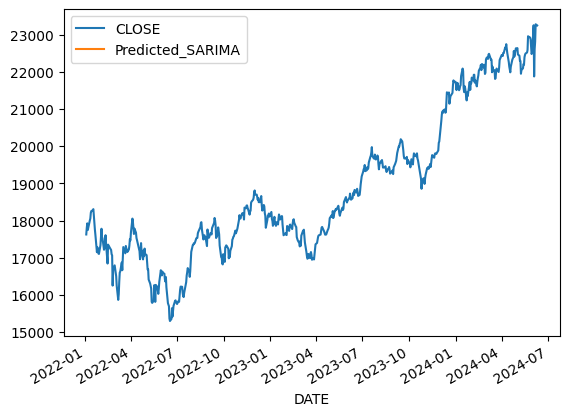

In [131]:
test_data[['CLOSE','Predicted_SARIMA']].plot()